# Initialization

In order to make some analysis, we need to set our environment up. To do this, I firstly imported some modules and read the data.

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from random import randrange
from random import seed
from statistics import mean 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading Data 
df = pd.read_csv('data/Iris.csv')
#df.describe()
#df.info()
df['Class']=df['Species']
df['Class'] = df['Class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df["Class"].unique()
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


## Logistic Regression

<span id="5"></span>In order to get results between 0 and 1, a function, which is called **sigmoid**, is used to transform our hypothesis function. It is defined as
$$h_{\theta}(x) = g(\theta^{T} x)$$ where $h_{\theta}(x)$ is the hypothesis function, $x$ is a single record and $$g(z)=\dfrac{1}{1+e^{-z}}$$

By using $g(\theta^{T} x)$, we obtain the probablity and if $h_{\theta}(x) \geq 0.5$, we get $y=1$; if $h_{\theta}(x) < 0.5$, we get $y=0$. Further, when $z \geq 0$, $g(z) \geq 0.5$ is another detail. Thus, if the $\theta^{T} x \geq 0$, then $y=1$.
 
By the definition, I defined the below ***sigmoid*** function.<span id="5"></span>

In [38]:
# Sigmoid Function 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

We can't use the same cost function that we use for linear regression because the Logistic Function will cause the output to be wavy, causing many local optima. In other words, it will not be a convex function. That's why we need to define a different cost function for logistic regression. It is simply defined as
$$J(\theta) = \dfrac{1}{m} \sum^{m}_{i=1}Cost(h_{\theta}(x^{(i)}), y^{(i)})$$ where $$Cost(h_{\theta}(x^{(i)}), y^{(i)})=-y^{(i)} \; log(h_{\theta}(x^{(i)}))-(1-y^{(i)}) \; log(1-h_{\theta}(x^{(i)}))$$

As the sanity check, $J(\theta)$ can be plotted or printed as a function of the number of iterations to be sure that $J(\theta)$ is **decreasing on every iteration**, which shows that it is converging correctly. At this point, choice of $\alpha$ is important. If we select a high or small $\alpha$ value, we might have problem about the converging.<span id="6"></span>

In [39]:
# Cost Function
def J(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In order to find the $\theta$ values that minimizes the cost function, I use gradient descent and we can summarize it as

Repeat{
       1. Calculate gradient average
       2. Multiply by learning rate alpha
       3. Subtract from theta
}

Also, it can be mathemathically demonstrated as

$$\textbf{Repeat}\{ \; \theta_{j}:= \theta_{j}-\alpha \dfrac{\partial}{\partial \theta_{j}}J(\theta) \; \} \;  where \;  j \in \{0,1,2,...,n \}$$

$$or$$

$$\textbf{Repeat}\{ \; \theta_{j}:= \theta_{j}-\dfrac{\alpha}{m} \sum^{m}_{i=1} (h_{\theta}(x^{(i)})-y^{(i)}) \; x_{j}^{(i)} \; \} \;  where \;  j \in \{0,1,2,...,n \}$$

Algorithm looks identitcal to linear regression but be aware that this time $h_{\theta}(x^{(i)})$ function has a **different definition** and that's why, they are not the same.

I would also like to explain **regularization**. Regularization is designed to address the problem of overfitting and undefitting. To start with the **overfitting**, it means high variance and it is usually caused by a complicated function that creates a lot of unnecessary curves and angles unrelated to the data. This function fits to training data well but might cause poor results for the test set. On the other hand, **underfitting** means low variance and a very simple model. This might also cause poor results too. In this situation, we need to adjust features manually or use some model selection algoritms which brings an extra workload. Conversely, when we apply regularization, all the features are kept and the model adjusts $\theta_{j}$. This especially works when we have a lot of slightly useful features.

When we add regularization, the new cost fucntion is
$$J(\theta) = \dfrac{1}{m} \sum^{m}_{i=1}\left[-y^{(i)} \; log(h_{\theta}(x^{(i)}))-(1-y^{(i)}) \; log(1-h_{\theta}(x^{(i)}))\right]+\dfrac{\lambda}{2m}\sum^{n}_{j=1}\theta^{2}_{j}$$
Also, the new gradient descent can be mathemathically demonstrated as 

$\textbf{Repeat}\{$ $$  \theta_{0}:= \theta_{0}-\dfrac{\alpha}{m} \sum^{m}_{i=1} (h_{\theta}(x^{(i)})-y^{(i)}) \; x_{0}^{(i)} \\ \theta_{j}:= \theta_{j}- \alpha \left[ \left( \dfrac{1}{m} \sum^{m}_{i=1} (h_{\theta}(x^{(i)})-y^{(i)}) \; x_{j}^{(i)} \right) + \dfrac{\lambda}{m} \; \theta_{j} \right] \;where\;  j \in \{1,2,...,n \} $$ $\}$ <span id="7"></span>

In [40]:
# Gradient Descent Function
def gradientdescent(X, y, lmd, alpha, num_iter):

    # select initial values zero
    theta = np.zeros(X.shape[1])
    
    ## lists used for the sanity check
    cost_history=[]
    itr=[]
    
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        
        # adding regularization 
        reg = lmd / y.size * theta
        # first theta is intercept
        # it is not regularized
        reg[0] = 0
        
        gradient = np.dot(X.T, (h - y)) / y.size + reg
        theta = theta - alpha * gradient

    ## This part is used for the sanity check  
        cost = J(h, y)
        if( i % 1000 == 0): 
            print('Number of Iterations: ', i, 'Cost : ', cost, 'Theta: ', theta)
        if i <= 600:
            cost_history.append(J(h, y))
            itr.append(i)   
    fig = plt.figure()
    ax = fig.add_subplot(111)   
    ax.plot(itr,cost_history)
    
    return theta

In [41]:
# Predict Function 
def predict(X_test, theta):
    z = np.dot(X_test, theta)
    return sigmoid(z)

Lastly, I defined my main function for the logistic regression. However, there is one more point to explain. When we have more than two classes we  can't apply the method we use for the binary classification. At this point, I prefered to use one vs all (one vs rest) method. Mathematically, it can be demonstrated as
$$h_{\theta}^{(i)}(x)=P(y=i \;  | \;  x;\theta) \;\;\;\;\; (i=1,2,...,n)$$ 
where $n$ is the number of classes. After calculating the above equation, we pick the class $i$ that maximizes $h_{\theta}^{(i)}(x)$ to decide the class.<span id="8"></span>

In [42]:
# Main Logistic Function
def logistic(X_train, y_train, X_test, lmd=0, alpha=0.1, num_iter=30000):
    # Adding intercept
    intercept = np.ones((X_train.shape[0], 1))
    X_train = np.concatenate((intercept, X_train), axis=1)
    
    intercept = np.ones((X_test.shape[0], 1))
    X_test = np.concatenate((intercept, X_test), axis=1)

    # one vs all
    u=set(y_train)
    t=[]
    for c in u:
        # set the labels to 0 and 1
        ynew = np.array(y_train == c, dtype = int)
        t.append(gradientdescent(X_train, ynew, lmd, alpha, num_iter))
    
    # Calculate probabilties
    pred = np.zeros((len(u),len(X_test)))
    for i in range(len(u)):
        pred[i,:] = predict(X_test,t[i])
    
    # Select max probability
    c = np.argmax(pred, axis=0)
        
    return c

## Testing the Functions

To test my functions, I defined 3 different points which are very close to the existing 3 points and splitted the data as training and test sets. I expect that the predicted labels will be the same as the real points and my functions will give similar results to scikit learn's functions.

In [43]:
# I chose data points close to the real data points X[15], X[66] and X[130]
test = np.array([[5.77,4.44,1.55,0.44],[5.66,3.01,4.55,1.55],[7.44, 2.88, 6.11, 1.99]])
print("TEST POINTS\n", test)

all_X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
all_y = df['Class']

# split data as training and test
df=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Class']]
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=2)
X_train = train_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train_data['Class']
X_test = test_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = test_data['Class']

def transform(i):
    if i == 0:
        return 'Iris-setosa'
    if i == 1:
        return 'Iris-versicolor'
    if i == 2:
        return 'Iris-virginica'

TEST POINTS
 [[5.77 4.44 1.55 0.44]
 [5.66 3.01 4.55 1.55]
 [7.44 2.88 6.11 1.99]]


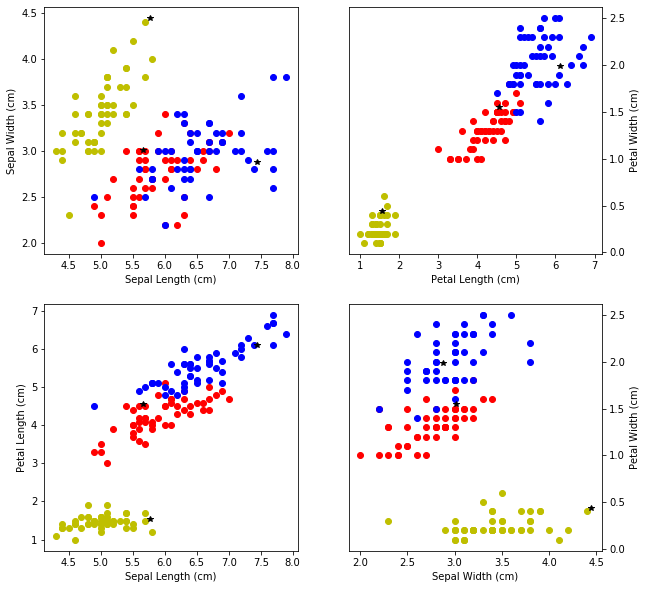

In [44]:
plt.figure(figsize=(10,10))
t=np.unique(all_y)

ax1=plt.subplot(2, 2, 1)
ax1.set(xlabel='Sepal Length (cm)', ylabel='Sepal Width (cm)')
plt.plot(df[df['Class']==t[0]].iloc[:,0], df[df['Class']==t[0]].iloc[:,1], 'o', color='y')
plt.plot(df[df['Class']==t[1]].iloc[:,0], df[df['Class']==t[1]].iloc[:,1], 'o', color='r')
plt.plot(df[df['Class']==t[2]].iloc[:,0], df[df['Class']==t[2]].iloc[:,1], 'o', color='b')
# test datapoints
plt.plot(test[0,0],test[0,1],'*',color="k")
plt.plot(test[1,0],test[1,1],'*',color="k")
plt.plot(test[2,0],test[2,1],'*',color="k")

ax2=plt.subplot(2, 2, 2)
ax2.set(xlabel='Petal Length (cm)', ylabel='Petal Width (cm)')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.plot(df[df['Class']==t[0]].iloc[:,2], df[df['Class']==t[0]].iloc[:,3], 'o', color='y')
plt.plot(df[df['Class']==t[1]].iloc[:,2], df[df['Class']==t[1]].iloc[:,3], 'o', color='r')
plt.plot(df[df['Class']==t[2]].iloc[:,2], df[df['Class']==t[2]].iloc[:,3], 'o', color='b')
# test datapoints
plt.plot(test[0,2],test[0,3],'*',color="k")
plt.plot(test[1,2],test[1,3],'*',color="k")
plt.plot(test[2,2],test[2,3],'*',color="k")

ax3=plt.subplot(2, 2, 3)
ax3.set(xlabel='Sepal Length (cm)', ylabel='Petal Length (cm)')
plt.plot(df[df['Class']==t[0]].iloc[:,0], df[df['Class']==t[0]].iloc[:,2], 'o', color='y')
plt.plot(df[df['Class']==t[1]].iloc[:,0], df[df['Class']==t[1]].iloc[:,2], 'o', color='r')
plt.plot(df[df['Class']==t[2]].iloc[:,0], df[df['Class']==t[2]].iloc[:,2], 'o', color='b')
# test datapoints
plt.plot(test[0,0],test[0,2],'*',color="k")
plt.plot(test[1,0],test[1,2],'*',color="k")
plt.plot(test[2,0],test[2,2],'*',color="k")

ax4=plt.subplot(2, 2, 4)
ax4.set(xlabel='Sepal Width (cm)', ylabel='Petal Width (cm)')
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
plt.plot(df[df['Class']==t[0]].iloc[:,1], df[df['Class']==t[0]].iloc[:,3], 'o', color='y')
plt.plot(df[df['Class']==t[1]].iloc[:,1], df[df['Class']==t[1]].iloc[:,3], 'o', color='r')
plt.plot(df[df['Class']==t[2]].iloc[:,1], df[df['Class']==t[2]].iloc[:,3], 'o', color='b')
# test datapoints
plt.plot(test[0,1],test[0,3],'*',color="k")
plt.plot(test[1,1],test[1,3],'*',color="k")
plt.plot(test[2,1],test[2,3],'*',color="k");


## Logistic Regression from Scratch

Logistic Regression

Number of Iterations:  0 Cost :  0.6931471805599453 Theta:  [-0.02       -0.14270833 -0.04820833 -0.149625   -0.05483333]
Number of Iterations:  1000 Cost :  0.007037512160461971 Theta:  [ 0.2935029   0.4899116   1.78874541 -2.80093013 -1.24974339]
Number of Iterations:  2000 Cost :  0.003749116951796412 Theta:  [ 0.33440242  0.55990126  2.07754758 -3.2339484  -1.44805628]
Number of Iterations:  3000 Cost :  0.002592300159944035 Theta:  [ 0.35807462  0.600538    2.25120764 -3.49332695 -1.56863134]
Number of Iterations:  4000 Cost :  0.00199449343698189 Theta:  [ 0.37474955  0.62926342  2.37656313 -3.6800717  -1.65633452]
Number of Iterations:  5000 Cost :  0.0016270997313382642 Theta:  [ 0.3876133   0.65149304  2.47502972 -3.82646971 -1.7256282 ]
Number of Iterations:  6000 Cost :  0.001377503353610956 Theta:  [ 0.39807805  0.66962683  2.5562862  -3.94708712 -1.78308063]
Number of Iterations:  7000 Cost :  0.0011964256841222468 Theta:  [ 0.40689399  0.68494057  2.6

Number of Iterations:  8000 Cost :  0.07317576674138758 Theta:  [-3.89389648 -3.44844956 -3.7002223   4.91799013  7.08824801]
Number of Iterations:  9000 Cost :  0.07151387629350851 Theta:  [-4.15856517 -3.50460433 -3.79759705  5.00385068  7.36388859]
Number of Iterations:  10000 Cost :  0.07011053623666076 Theta:  [-4.41145713 -3.55118537 -3.88273453  5.07770227  7.61168301]
Number of Iterations:  11000 Cost :  0.06890307113336153 Theta:  [-4.65417487 -3.59004344 -3.95806294  5.14202767  7.8362667 ]
Number of Iterations:  12000 Cost :  0.06784812181240758 Theta:  [-4.88795    -3.62255141 -4.0253797   5.1986328   8.04119828]
Number of Iterations:  13000 Cost :  0.06691465904635062 Theta:  [-5.11375409 -3.64975858 -4.08604698  5.24886995  8.22927564]
Number of Iterations:  14000 Cost :  0.06607984357437323 Theta:  [-5.33237059 -3.67248679 -4.14111807  5.29377672  8.40274222]
Number of Iterations:  15000 Cost :  0.06532645956713784 Theta:  [-5.54444326 -3.6913928  -4.1914219   5.33416588

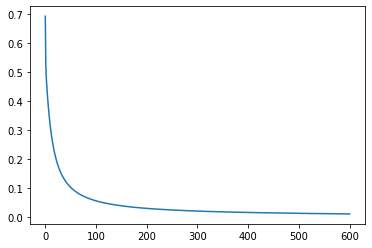

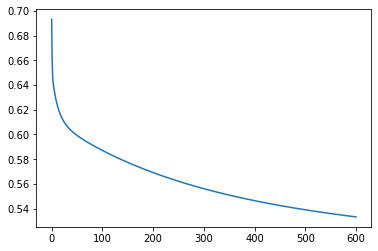

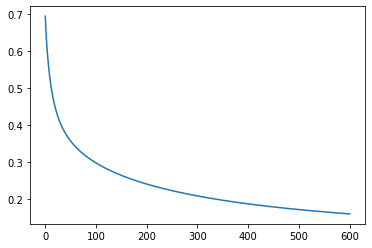

In [45]:
# Predicting the classes of the test data by Logistic Regression
print("Logistic Regression\n")
c=logistic(X_train,y_train,test)
# print results
for i in range(len(c)):
    ct=set(map(transform,[c[i]]))
    print("Test point: "+str(test[i,:])+"  Label: "+str(c[i])+" "+str(ct))

## Logistic Regression from Scratch vs scikit-learn Logistic Regression

Number of Iterations:  0 Cost :  0.6931471805599453 Theta:  [-0.02       -0.14270833 -0.04820833 -0.149625   -0.05483333]
Number of Iterations:  1000 Cost :  0.007037512160461971 Theta:  [ 0.2935029   0.4899116   1.78874541 -2.80093013 -1.24974339]
Number of Iterations:  2000 Cost :  0.003749116951796412 Theta:  [ 0.33440242  0.55990126  2.07754758 -3.2339484  -1.44805628]
Number of Iterations:  3000 Cost :  0.002592300159944035 Theta:  [ 0.35807462  0.600538    2.25120764 -3.49332695 -1.56863134]
Number of Iterations:  4000 Cost :  0.00199449343698189 Theta:  [ 0.37474955  0.62926342  2.37656313 -3.6800717  -1.65633452]
Number of Iterations:  5000 Cost :  0.0016270997313382642 Theta:  [ 0.3876133   0.65149304  2.47502972 -3.82646971 -1.7256282 ]
Number of Iterations:  6000 Cost :  0.001377503353610956 Theta:  [ 0.39807805  0.66962683  2.5562862  -3.94708712 -1.78308063]
Number of Iterations:  7000 Cost :  0.0011964256841222468 Theta:  [ 0.40689399  0.68494057  2.62555282 -4.04976882 -

Number of Iterations:  7000 Cost :  0.07519065451565826 Theta:  [-3.61529913 -3.3801313  -3.58723652  4.81658474  6.77854211]
Number of Iterations:  8000 Cost :  0.07317576674138758 Theta:  [-3.89389648 -3.44844956 -3.7002223   4.91799013  7.08824801]
Number of Iterations:  9000 Cost :  0.07151387629350851 Theta:  [-4.15856517 -3.50460433 -3.79759705  5.00385068  7.36388859]
Number of Iterations:  10000 Cost :  0.07011053623666076 Theta:  [-4.41145713 -3.55118537 -3.88273453  5.07770227  7.61168301]
Number of Iterations:  11000 Cost :  0.06890307113336153 Theta:  [-4.65417487 -3.59004344 -3.95806294  5.14202767  7.8362667 ]
Number of Iterations:  12000 Cost :  0.06784812181240758 Theta:  [-4.88795    -3.62255141 -4.0253797   5.1986328   8.04119828]
Number of Iterations:  13000 Cost :  0.06691465904635062 Theta:  [-5.11375409 -3.64975858 -4.08604698  5.24886995  8.22927564]
Number of Iterations:  14000 Cost :  0.06607984357437323 Theta:  [-5.33237059 -3.67248679 -4.14111807  5.29377672 

Number of Iterations:  14000 Cost :  0.4781059605280373 Theta:  [ 6.91391664 -0.01821422 -2.83509109  1.18083781 -2.89252203]
Number of Iterations:  15000 Cost :  0.47777519619560144 Theta:  [ 7.09065538 -0.03444233 -2.86558841  1.18103553 -2.88540752]
Number of Iterations:  16000 Cost :  0.4775079286083475 Theta:  [ 7.24929615 -0.04861329 -2.89344116  1.1808354  -2.87858009]
Number of Iterations:  17000 Cost :  0.4772914116569085 Theta:  [ 7.39186269 -0.06105266 -2.91883472  1.1803867  -2.87214585]
Number of Iterations:  18000 Cost :  0.47711559755360056 Theta:  [ 7.52012061 -0.0720211  -2.94195668  1.17979112 -2.86615676]
Number of Iterations:  19000 Cost :  0.47697252846708976 Theta:  [ 7.63561612 -0.08172983 -2.9629905   1.17911746 -2.86063005]
Number of Iterations:  20000 Cost :  0.4768558755998914 Theta:  [ 7.73970798 -0.09035192 -2.98211157  1.1784118  -2.85556123]
Number of Iterations:  21000 Cost :  0.47676058700464663 Theta:  [ 7.83359392 -0.09803071 -2.99948514  1.17770448 -

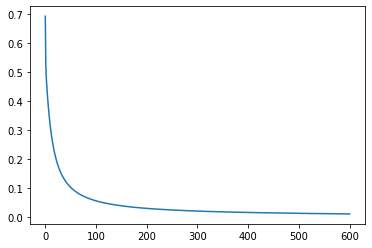

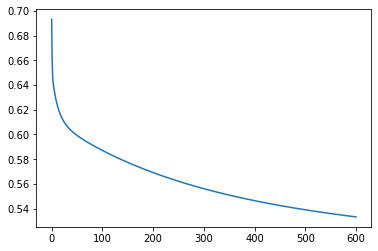

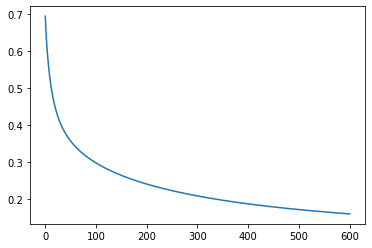

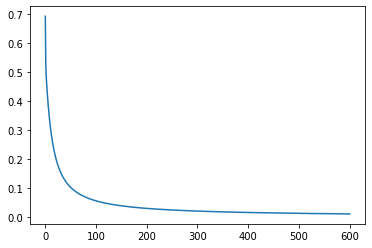

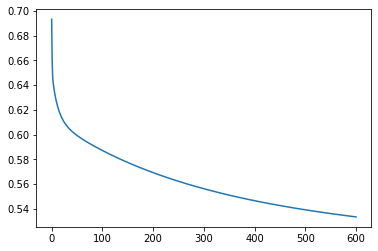

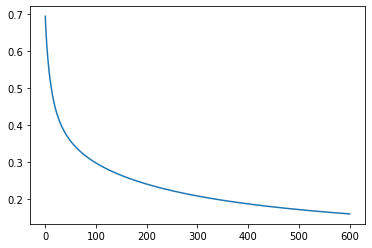

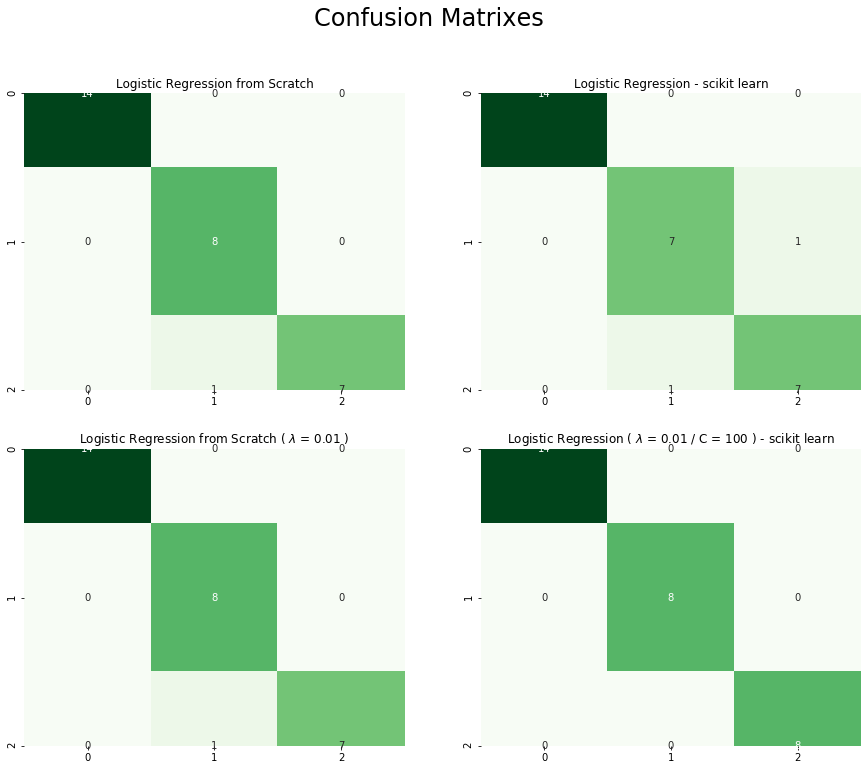

In [33]:
# logistic regression from scratch
c=logistic(X_train,y_train,X_test)
cm=confusion_matrix(y_test, c)

# logistic regression - scikit learn
sck = LogisticRegression().fit(X_train, y_train)
sck_cm=confusion_matrix(y_test, sck.predict(X_test))

# logistic regression from scratch
c_r=logistic(X_train,y_train,X_test,lmd=0.01)
cm_r=confusion_matrix(y_test, c_r)

# logistic regression - scikit learn
sck_r = LogisticRegression(C=100).fit(X_train, y_train)
sck_cm_r=confusion_matrix(y_test, sck_r.predict(X_test))

plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrixes",fontsize=24)

plt.subplot(2,2,1)
plt.title("Logistic Regression from Scratch")
sns.heatmap(cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,2)
plt.title("Logistic Regression - scikit learn")
sns.heatmap(sck_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,3)
plt.title("Logistic Regression from Scratch ( $\lambda$ = 0.01 )")
sns.heatmap(cm_r, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,4)
plt.title("Logistic Regression ( $\lambda$ = 0.01 / C = 100 ) - scikit learn")
sns.heatmap(sck_cm_r, annot = True, cmap="Greens",cbar=False);